In [16]:
# This is the case study 1 for the income.csv dataset
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the data

In [2]:

data = pd.read_csv('income(1).csv')
print(data.head())

# Making the copies of the data
data1 = data.copy()
# Printing the information of the data
print("The information of the data is as follows")
print(data1.info())

   age       JobType         EdType        maritalstatus       occupation  \
0   45       Private        HS-grad             Divorced     Adm-clerical   
1   24   Federal-gov        HS-grad        Never-married     Armed-Forces   
2   44       Private   Some-college   Married-civ-spouse   Prof-specialty   
3   27       Private            9th        Never-married     Craft-repair   
4   20       Private   Some-college        Never-married            Sales   

      relationship    race   gender  capitalgain  capitalloss  hoursperweek  \
0    Not-in-family   White   Female            0            0            28   
1        Own-child   White     Male            0            0            40   
2          Husband   White     Male            0            0            40   
3   Other-relative   White     Male            0            0            40   
4    Not-in-family   White     Male            0            0            35   

    nativecountry                        SalStat  
0   United-

# Summary statistics of the data

In [3]:

# summary for numerical data
print("The summary for numerical data is as follows")
summary_num = data1.describe()
print(summary_num)

# summary for categorical data
print("The summary for categorical data is as follows")
print(data1.describe(include='object'))


print(data1['JobType'].value_counts())
print(np.unique(data1['JobType']))

The summary for numerical data is as follows
                age   capitalgain   capitalloss  hoursperweek
count  31978.000000  31978.000000  31978.000000  31978.000000
mean      38.579023   1064.360623     86.739352     40.417850
std       13.662085   7298.596271    401.594301     12.345285
min       17.000000      0.000000      0.000000      1.000000
25%       28.000000      0.000000      0.000000     40.000000
50%       37.000000      0.000000      0.000000     40.000000
75%       48.000000      0.000000      0.000000     45.000000
max       90.000000  99999.000000   4356.000000     99.000000
The summary for categorical data is as follows
         JobType    EdType        maritalstatus       occupation relationship  \
count      31978     31978                31978            31978        31978   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22286     10368

# Check for missing values

In [4]:

print('The missing values are as follows\n',data1.isnull().sum())

The missing values are as follows
 age              0
JobType          0
EdType           0
maritalstatus    0
occupation       0
relationship     0
race             0
gender           0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
SalStat          0
dtype: int64


# Reloading the data in a new dataframe

In [28]:
data2 = pd.read_csv('income(1).csv', na_values=['?'])
print(data2['JobType'].value_counts())
print(data1.isnull().any(axis=1))
# Dropping the missing values
print("Droped the missing values")
data3=data2.dropna(axis=0)
print(data3)
# print(data3['JobType'].value_counts())


JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64
0        False
1        False
2        False
3        False
4        False
         ...  
31973    False
31974    False
31975    False
31976    False
31977    False
Length: 31978, dtype: bool
Droped the missing values
       age       JobType         EdType        maritalstatus  \
0       45       Private        HS-grad             Divorced   
1       24   Federal-gov        HS-grad        Never-married   
2       44       Private   Some-college   Married-civ-spouse   
3       27       Private            9th        Never-married   
4       20       Private   Some-college        Never-married   
...    ...           ...            ...                  ...   
31973   34     Local-gov        HS-grad        Never-married   
31

# Finding the correlation between the numerical data

In [6]:

print("The correlation between the numerical data is as follows")
# Select only the numeric columns
numeric_cols = data3.select_dtypes(include=[np.number])
# Compute the correlation
correlation = numeric_cols.corr()
print(correlation)  

The correlation between the numerical data is as follows
                   age  capitalgain  capitalloss  hoursperweek
age           1.000000     0.077490     0.057282      0.068299
capitalgain   0.077490     1.000000    -0.031499      0.079112
capitalloss   0.057282    -0.031499     1.000000      0.053106
hoursperweek  0.068299     0.079112     0.053106      1.000000


# Plotting the graphs

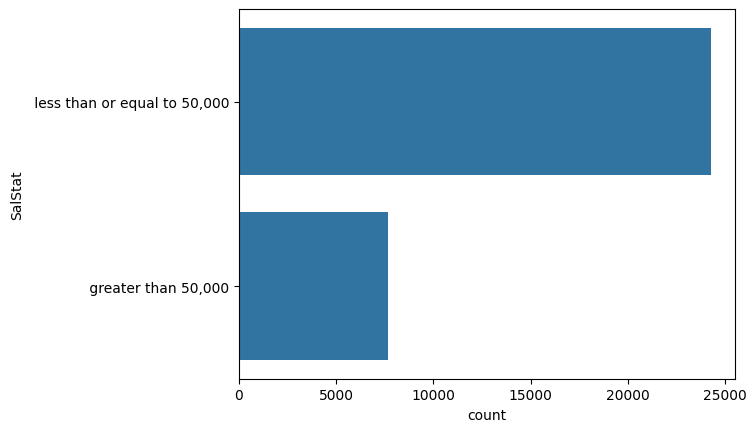

In [7]:
# Plotting the histogram
plot=sns.countplot(data3['SalStat'])

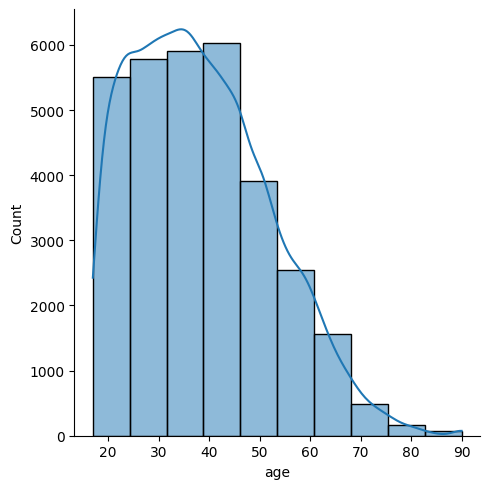

In [6]:
sns.displot(data3['age'],bins=10,kde=True)

<Axes: xlabel='SalStat', ylabel='age'>

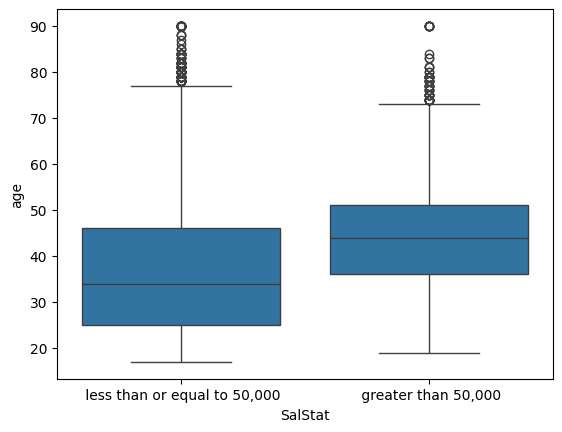

In [13]:
sns.boxplot(x='SalStat',y='age',data=data3)

<Axes: xlabel='count', ylabel='EdType'>

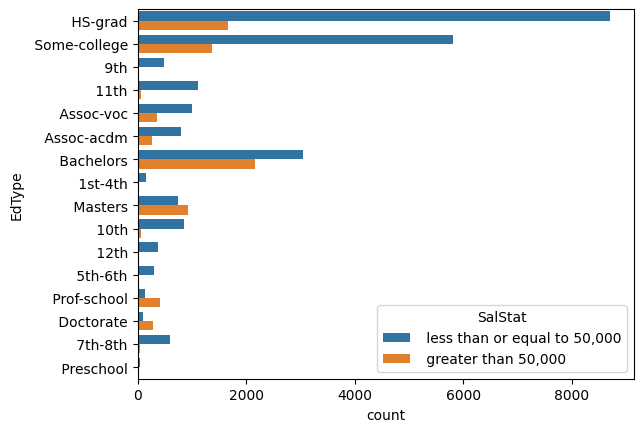

In [19]:
# Graph of Education vs Salary Status
sns.countplot(y='EdType',hue='SalStat',data=data3)

<Axes: xlabel='count', ylabel='JobType'>

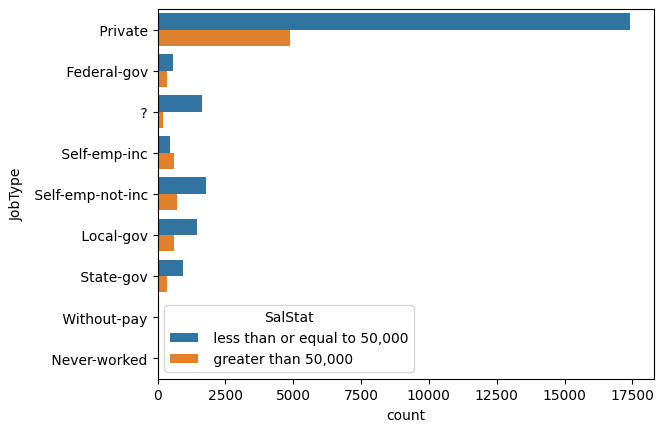

In [29]:
# plot of JobType vs Salary Status
sns.countplot(y='JobType',hue="SalStat",data=data3)